In [ ]:
# 1)
# dataset -> image, label (10)
# dataloader -> batch

# 2)
# network.parameters()

# 3) loss function (CrossEntropyLoss / BinaryCrossEntropy)

# loss_function = CrossEntropyLoss()
# loss_function(pred, target)

# pred -> [0.5, 0.2, 0.3, 0., 0., 0., 0., 0., 0.,]  - вероятности
# !!!! pred -> [-1000, 24, -5, 12, 23, 0, 23, 54, 1, 32]  - logit <- softmax(вероятности)

# target
# [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# 5

# 4) optim SGD, Adam
# optim = Adam(network.parameters())

# for batch in dataloader:
#     optim.zero_grad()
#     pred = net(images)
#     loss = loss_function(pred, target)
#     loss.backward()
#     optim.step()

# 1. Классификатор
## 1. 1. Dataset и Dataloader

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = torchvision.transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10('/data', train=True, transform=transform, download=True)
test_set = torchvision.datasets.CIFAR10('/data', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False, num_workers=2)

##  1. 2. Network architecture

In [ ]:
class SimpleNet(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # 3x32x32
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.act1 = torch.nn.ReLU()
        self.conv2 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.act2 = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2)

        # 64x16x16
        self.conv3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.act3 = torch.nn.ReLU()
        self.conv4 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.act4 = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2)

        # 128x8x8
        self.conv5 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.act5 = torch.nn.ReLU()
        self.conv6 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.act6 = torch.nn.ReLU()
        self.pool3 = torch.nn.MaxPool2d(kernel_size=2)

        # 256x4x4
        self.conv7 = torch.nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.act7 = torch.nn.ReLU()
        self.conv8 = torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.act8 = torch.nn.ReLU()
        self.pool4 = torch.nn.MaxPool2d(kernel_size=2)

        # 512x2x2
        self.conv9 = torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.act9 = torch.nn.ReLU()
        self.conv10 = torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.act10 = torch.nn.ReLU()
        self.pool5 = torch.nn.MaxPool2d(kernel_size=2)

        # Nx1x1
        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(in_features=512, out_features=1024)
        self.fc2 = torch.nn.Linear(in_features=1024, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool1(x)

        # 64x16x16
        x = self.conv3(x)
        x = self.act3(x)
        x = self.conv4(x)
        x = self.act4(x)
        x = self.pool2(x)

        # 128x8x8
        x = self.conv5(x)
        x = self.act5(x)
        x = self.conv6(x)
        x = self.act6(x)
        x = self.pool3(x)

        # 256x4x4
        x = self.conv7(x)
        x = self.act7(x)
        x = self.conv8(x)
        x = self.act8(x)
        x = self.pool4(x)

        # 512x2x2
        x = self.conv9(x)
        x = self.act9(x)
        x = self.conv10(x)
        x = self.act10(x)
        x = self.pool5(x)

        # Nx1x1
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# net = SimpleNet().to(device)
from torchvision.models import resnet18
net = resnet18(pretrained=True)
net.fc = torch.nn.Linear(in_features=512, out_features=10, bias=True)
net = net.to(device)

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

In [ ]:
# for epoch in range(5):

#     net.train()
#     epoch_loss = 0.
#     correct = 0
#     total = 0

#     for batch in train_loader:
#         images, labels = batch
#         images = images.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()
#         predictions = net(images)
#         correct += (labels == predictions.argmax(dim=1,)).sum()
#         total += len(labels)

#         loss = loss_function(predictions, labels)
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()
#     print(f'Train: {epoch_loss / len(train_loader)} | acc: {correct / total}')

#     net.eval()
#     epoch_loss = 0.
#     correct = 0
#     total = 0

#     for batch in test_loader:
#         images, labels = batch
#         images = images.to(device)
#         labels = labels.to(device)

#         predictions = net(images)

#         correct += (labels == predictions.argmax(dim=1,)).sum()
#         total += len(labels)

#         with torch.no_grad():
#             loss = loss_function(predictions, labels)

#         epoch_loss += loss.item()
#     print(f'Test: {epoch_loss / len(test_loader)} | acc: {correct / total}')


# Localization

In [ ]:
class PixelRegressionDataset(torch.utils.data.Dataset):
    def __init__(self, donor_dataset):
        self.donor_dataset = donor_dataset

    def __len__(self):
        return len(self.donor_dataset)

    def __getitem__(self, idx):
        img_tensor, object_label = self.donor_dataset[idx]
        channels, h, w = img_tensor.size()
        x = np.random.randint(w)
        y = np.random.randint(h)
        img_tensor[1:2, y, x] = -1
        return {'image': img_tensor, 'xy': torch.FloatTensor([x, y]), 'label': object_label}

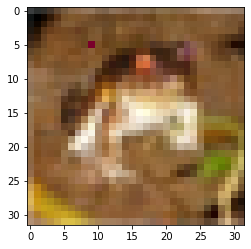

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_image(img_tensor):
    image = np.moveaxis(img_tensor.numpy(), 0, 2)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    plt.imshow(image)

show_image(next(iter(PixelRegressionDataset(train_set)))['image'])

In [ ]:
train_loader = torch.utils.data.DataLoader(PixelRegressionDataset(train_set), batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(PixelRegressionDataset(test_set), batch_size=100, shuffle=False, num_workers=2)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# net = SimpleNet().to(device)
from torchvision.models import resnet18
net = resnet18(pretrained=True)
net.fc = torch.nn.Linear(in_features=512, out_features=12, bias=True)
net = net.to(device)

In [ ]:
loss_function_xy = torch.nn.L1Loss()
loss_function_bce = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [ ]:
for epoch in range(10):

    net.train()
    epoch_loss = 0.

    for batch in train_loader:
        images, xy, labels = batch['image'], batch['xy'], batch['label'] 
        images = images.to(device)
        xy = xy.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        predictions = net(images)

        loss = loss_function_xy(predictions[:, 10:], xy) + loss_function_bce(predictions[:, :10], labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f'Train: {epoch_loss / len(train_loader)}')

    net.eval()
    epoch_loss = 0.

    for batch in test_loader:
        images, xy, labels = batch['image'], batch['xy'], batch['label'] 
        images = images.to(device)
        xy = xy.to(device)
        labels = labels.to(device)

        predictions = net(images)

        with torch.no_grad():
            loss = loss_function_xy(predictions[:, 10:], xy) + loss_function_bce(predictions[:, :10], labels)

        epoch_loss += loss.item()
    print(f'Test: {epoch_loss / len(test_loader)}')

Train: 9.139773449324586
Test: 7.617542395591736
Train: 5.219572325191839
Test: 4.0513435959815975
Train: 3.500195002007058
Test: 3.059790840148926
Train: 2.937287454409977
Test: 2.6249259376525877
Train: 2.576787848606744
Test: 2.482618460655212
Train: 2.349819108348368
Test: 2.2192626225948335
Train: 2.16077591909472
Test: 2.076004719734192
Train: 1.993189788840311


KeyboardInterrupt: ignored

tensor(0, device='cuda:0') tensor(6, device='cuda:0')


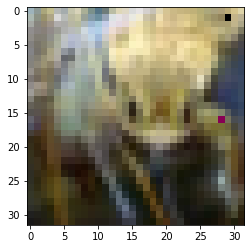

In [ ]:
image_tensor = images[0].cpu().clone()
x, y = predictions[0, 10:].cpu().round().int()
# print(image_tensor)
image_tensor[:, y.item(), x.item()] = -1
show_image(image_tensor)

print(predictions[0, 10:].argmax(dim=0), labels[0])